        country iso3                                         components  \
0   Afghanistan  AFG  Bread (1 KG, Index Weight = 1), Rice (Low Qual...   
1       Armenia  ARM  Apples (Red) (1 KG, Index Weight = 1), Bread (...   
2       Burundi  BDI  Bananas (1 KG, Index Weight = 1), Beans (1 KG,...   
3  Burkina Faso  BFA  Maize (White) (1 KG, Index Weight = 1), Millet...   
4    Bangladesh  BGD  Lentils (Masur) (1 KG, Index Weight = 1), Oil ...   

  currency start_date_observations end_date_observations  \
0      AFN                Jan 2007              Jul 2024   
1      AMD                Nov 2008              Jun 2024   
2      BIF                Jan 2007              Jun 2024   
3      XOF                Jan 2007              Jun 2024   
4      BDT                Jan 2007              Jun 2024   

   number_of_markets_modeled  number_of_markets_covered  number_of_food_items  \
0                         40                         40                     3   
1                         

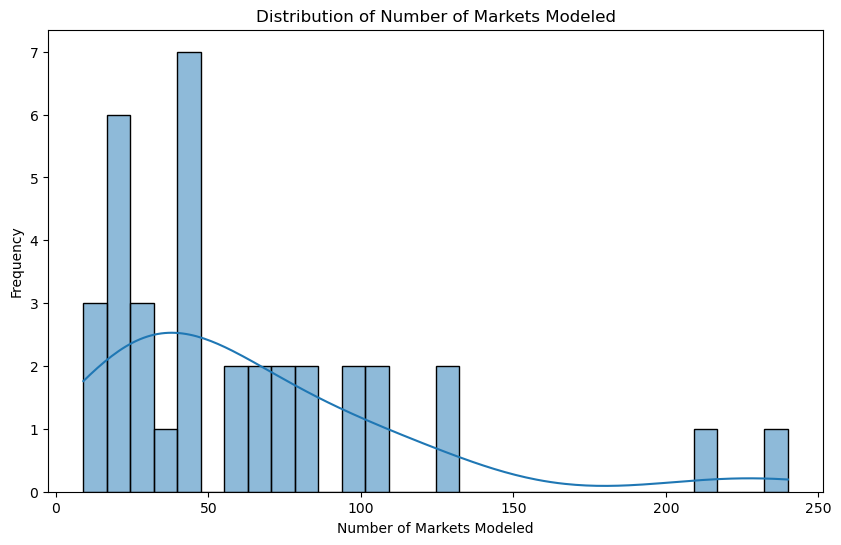

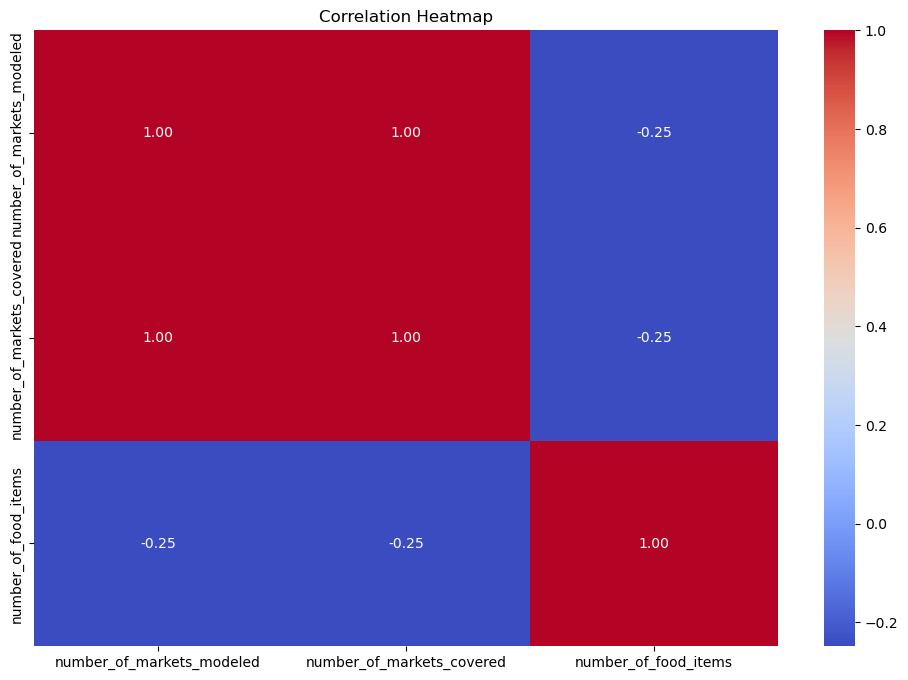

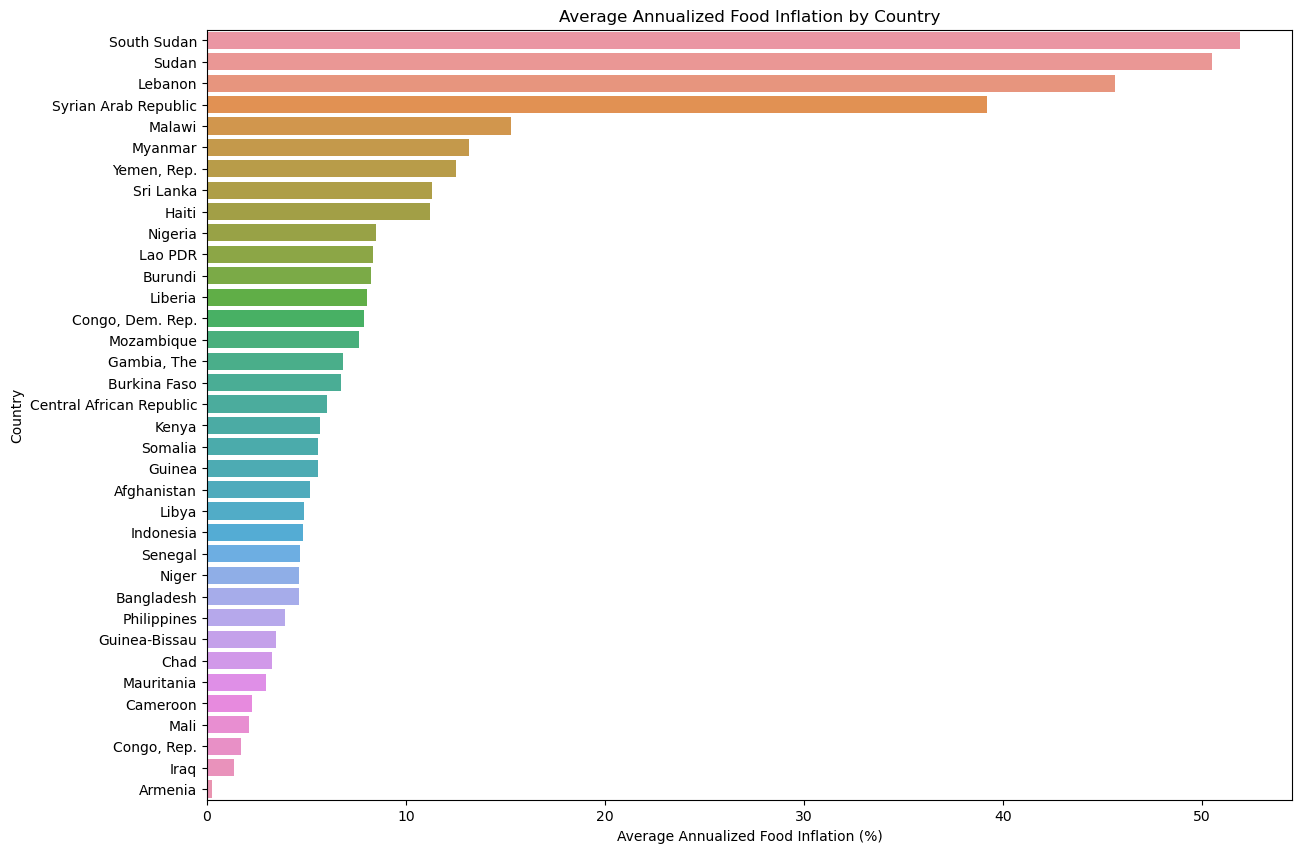

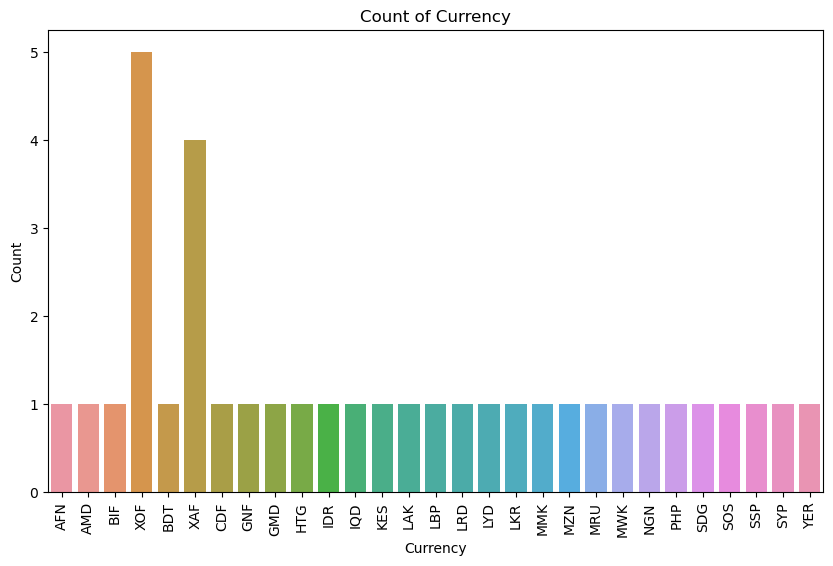

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'WLD_RTP_details_2024-07-29.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic information about the dataset
print(df.info())

# Distribution of Number of Markets Modeled
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_markets_modeled'], kde=True, bins=30)
plt.title('Distribution of Number of Markets Modeled')
plt.xlabel('Number of Markets Modeled')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
corr = df[['number_of_markets_modeled', 'number_of_markets_covered', 'number_of_food_items']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Convert the average_annualized_food_inflation column to numeric
df['average_annualized_food_inflation'] = df['average_annualized_food_inflation'].str.rstrip('%').astype('float')

# Plot Average Annualized Food Inflation by Country
plt.figure(figsize=(14, 10))
sns.barplot(x='average_annualized_food_inflation', y='country', data=df.sort_values('average_annualized_food_inflation', ascending=False))
plt.title('Average Annualized Food Inflation by Country')
plt.xlabel('Average Annualized Food Inflation (%)')
plt.ylabel('Country')
plt.show()

# Count Plot for Currency
plt.figure(figsize=(10, 6))
sns.countplot(x='currency', data=df)
plt.title('Count of Currency')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
